In [6]:
import pandas as pd
from urllib.request import Request, urlretrieve
from pathlib import Path  
import ssl
import os
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from art_api import config
from google.cloud import storage, vision

def init():
    imgs = []
    df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_FILE}")
    return imgs, df

def resize_rescale():
    imgs = []
    df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_FILE}")
    
    for index, row in df.iterrows():
        img_file = str(row["filename"])
        image = Image.open(os.path.join(config.PATH_YOURPAINTINGS, img_file))
        image = image.resize((256, 256), Image.ANTIALIAS)
        image.save(os.path.join(config.PATH_YOURPAINTINGS_SM, img_file))
        #imgs.append(np.array(image/255))
    return imgs, df

def load_data():
    '''
    This function loads our X and y from GCP
    '''
    imgs, df = init()
    
    for index, row in df.iterrows():
        img_file = str(row["filename"])
        image = Image.open(os.path.join(config.PATH_YOURPAINTINGS, img_file))   
        imgs.append(np.array(image))
    
    X = np.array(imgs)
    X.shape
    df.columns
    y = df.drop(columns=['index', 'Image URL', 'Web page URL', 'Subset', 'Labels', 'filename',
       'labels'])
    return X, y

ImportError: cannot import name 'vision' from 'google.cloud' (unknown location)

In [2]:
import pandas as pd
from urllib.request import Request, urlretrieve
from pathlib import Path  
import ssl
import os
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from art_api import config
#from google.cloud import storage, vision

In [3]:
from art_api import config, utils

imgs, df = utils.init()
def load_data(df):
    '''generates X and y'''
    '''read from disk or read from cloud'''
    for index, row in df.iterrows():
        img_file = str(row["filename"])
        image = Image.open(os.path.join(config.PATH_YOURPAINTINGS_SM, img_file))   
        imgs.append(np.array(image))
        X = np.array(imgs)
        X.shape
        y = df.drop(columns=['index', 'Image URL', 'Web page URL', 'Subset', 'Labels', 'filename', 'labels'])
        y.shape
    else:
        print(f"Please specify method of loading data/n testing")
    return X, y
X, y = load_data(df)

Please specify method of loading data/n testing


In [4]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
    print(os.getenv("TF_GPU_ALLOCATOR"))
    print(f"memory usage {tf.config.experimental.get_memory_info('GPU:0')['current'] / 10 ** 9} GB")

cuda_malloc_async
memory usage 0.0 GB


2022-09-12 02:55:24.649003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-12 02:55:24.704058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-12 02:55:24.704356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-12 02:55:24.706406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [11]:
X.shape[0]

8296

In [11]:
y

,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
8291,0,0,0,0,0,1,0,0,0,0
8292,0,0,1,0,0,0,0,0,0,0
8293,0,1,0,0,0,0,0,0,0,0
8294,0,1,0,0,0,0,0,0,0,0


In [5]:
undersample_num = y.sum().min()
undersample_num

195

In [6]:
from art_api.utils import get_classes_df, undersample

ImportError: cannot import name 'get_classes_df' from 'art_api.utils' (/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/art_api/utils.py)

In [12]:
def get_classes_df():
    undersample_num = y.sum().min()
    print(f"Minimum number of samples to take is {undersample_num}.")
    classes = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']
    df_aeroplane, df_bird, df_boat, df_chair, df_cow, df_diningtable, df_dog, df_horse, df_sheep, df_train = [y[y[cls] == 1] for cls in classes]
    return df_aeroplane, df_bird, df_boat, df_chair, df_cow, df_diningtable, df_dog, df_horse, df_sheep, df_train

def undersample(n, cls_df):
    '''This function will undersample all other classes based on the minority class
    n = number of samples to obtain
    X = class df, containing images from only 1 class
    y = target df
    '''
    cls_df = cls_df.sample(n)
    cls_X = X[cls_df.index]
    print(cls_df.index)

    return cls_df, cls_X

In [13]:
df_aeroplane, df_bird, df_boat, df_chair, df_cow, df_diningtable, df_dog, df_horse, df_sheep, df_train = get_classes_df()

Minimum number of samples to take is 195.


In [14]:
aeroplane_df, aeroplane_X = undersample(195, df_aeroplane)
bird_df, bird_X = undersample(195, df_bird)
boat_df, boat_X = undersample(195, df_boat)
chair_df, chair_X = undersample(195, df_chair)
cow_df, cow_X = undersample(195, df_cow)
diningtable_df, diningtable_X = undersample(195, df_diningtable)
dog_df, dog_X = undersample(195, df_dog)
horse_df, horse_X = undersample(195, df_horse)
sheep_df, sheep_X = undersample(195, df_sheep)
train_df, train_X = undersample(195, df_train)
#should load images ONLY after sampling

Int64Index([5583,  747, 5212, 6764, 6755, 5603, 2698, 3066, 4204, 2906,
            ...
            2974, 3850, 8263, 2968, 6367, 7623, 8024, 2320,  724, 3679],
           dtype='int64', length=195)
Int64Index([6636, 1038, 2027,  123, 6257,  201, 4186, 7771, 6309,  969,
            ...
            6255,  429, 7919, 7644,  714, 4181, 1001, 5011, 7164, 8043],
           dtype='int64', length=195)
Int64Index([4214, 5630, 7362, 5360, 2277, 2980, 5312, 2546, 1033, 2549,
            ...
            2007, 1165, 2217, 6156, 7207, 2030, 4557, 7941, 7634, 3186],
           dtype='int64', length=195)
Int64Index([4526, 2046, 7709, 3766, 7099, 7662, 6992, 4663,   13, 5114,
            ...
            3576, 2135, 2995, 2241, 1619,  146, 2370, 3704, 2932,  705],
           dtype='int64', length=195)
Int64Index([2161, 3962, 2279, 1929, 8069,  831, 1942, 3858, 6034, 3993,
            ...
            1907, 3862, 1554, 7891, 4725, 3623,  510, 1855, 3978,  376],
           dtype='int64', length=195)
Int64

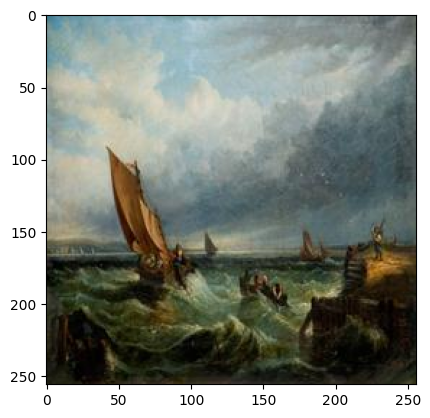

In [16]:
plt.imshow(boat_X[1])

In [17]:
print(X.shape)
print(y.shape)

(8296, 256, 256, 3)
(8296, 10)


In [18]:
y_under = pd.concat([df_aeroplane, bird_df, boat_df, chair_df, cow_df, diningtable_df, dog_df, horse_df, sheep_df, train_df], ignore_index=True)
y_under

,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1945,0,0,0,0,0,1,0,0,0,1
1946,0,0,0,0,0,0,0,0,0,1
1947,0,0,0,0,0,0,0,0,0,1
1948,0,0,1,0,0,0,0,0,0,1


In [70]:
y_under.shape

(1950, 10)

In [19]:
X_under = np.concatenate([aeroplane_X, bird_X, boat_X, chair_X, cow_X, diningtable_X, dog_X, horse_X, sheep_X, train_X], axis=0)

In [76]:
X_under.shape

(1950, 256, 256, 3)

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import save_img
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [174]:

def load_baseline_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='sigmoid'))
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [175]:
model = load_baseline_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
86/86 [==============================] - 12s 139ms/step - loss: 0.4365 - accuracy: 0.1011 - val_loss: 0.3896 - val_accuracy: 0.1536
Epoch 2/50
86/86 [==============================] - 16s 191ms/step - loss: 0.3865 - accuracy: 0.1245 - val_loss: 0.3828 - val_accuracy: 0.1945
Epoch 3/50
86/86 [==============================] - 10s 122ms/step - loss: 0.3731 - accuracy: 0.1736 - val_loss: 0.3637 - val_accuracy: 0.1775
Epoch 4/50
86/86 [==============================] - 5s 63ms/step - loss: 0.3583 - accuracy: 0.2300 - val_loss: 0.3513 - val_accuracy: 0.2048
Epoch 5/50
86/86 [==============================] - 17s 204ms/step - loss: 0.3472 - accuracy: 0.2681 - val_loss: 0.3489 - val_accuracy: 0.2218
Epoch 6/50
86/86 [==============================] - 8s 90ms/step - loss: 0.3402 - accuracy: 0.2762 - val_loss: 0.3524 - val_accuracy: 0.2491
Epoch 7/50
86/86 [==============================] - 5s 59ms/step - loss: 0.3374 - accuracy: 0.2960 - val_loss: 0.3381 - val_accuracy: 0.2526
Epoch

In [176]:
res = model.evaluate(X_test, y_test)
res

10/10 [==============================] - 1s 49ms/step - loss: 0.3419 - accuracy: 0.3219


[0.34189045429229736, 0.3219178020954132]

In [177]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 32.0 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


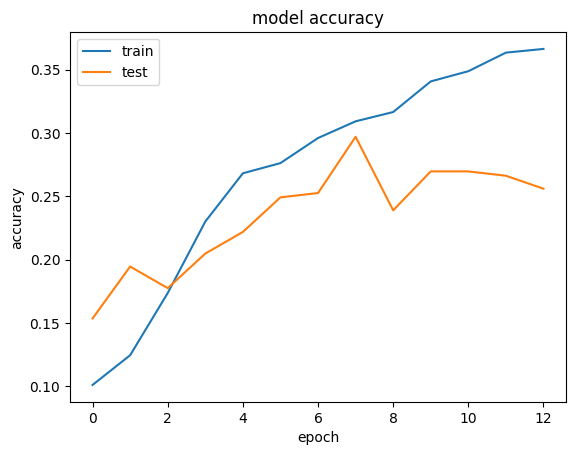

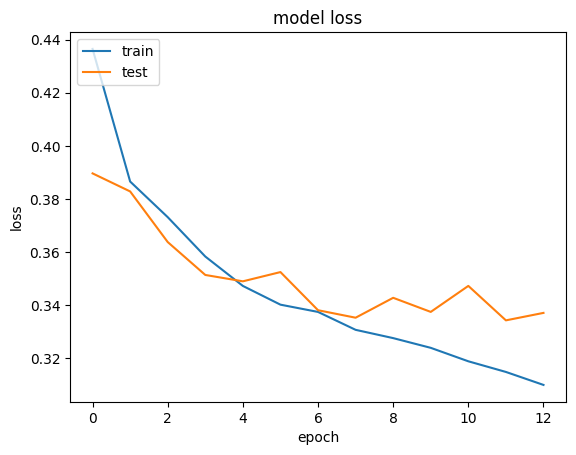

In [178]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [179]:
y_pred = model.predict(X_test)

10/10 [==============================] - 6s 647ms/step


In [180]:
print(np.mean(y_pred))
print(np.median(y_pred))

0.12681396
0.09570864


In [183]:
predictions = (model.predict(X_test) > 0.09570864).astype("int32")
print(classification_report(y_test, predictions, output_dict=False, target_names=classes))

10/10 [==============================] - 1s 93ms/step
              precision    recall  f1-score   support

   aeroplane       0.21      0.77      0.33        30
        bird       0.15      0.69      0.24        42
        boat       0.22      0.84      0.34        37
       chair       0.32      0.72      0.45        47
         cow       0.23      0.82      0.36        44
 diningtable       0.24      0.76      0.36        37
         dog       0.18      0.74      0.29        46
       horse       0.14      0.79      0.23        34
       sheep       0.23      0.76      0.36        34
       train       0.17      0.83      0.29        29

   micro avg       0.20      0.77      0.32       380
   macro avg       0.21      0.77      0.33       380
weighted avg       0.21      0.77      0.33       380
 samples avg       0.22      0.78      0.32       380



In [184]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']
predictions_df.sum()

aeroplane      108
bird           198
boat           144
chair          105
cow            155
diningtable    118
dog            186
horse          196
sheep          111
train          139
dtype: int64

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

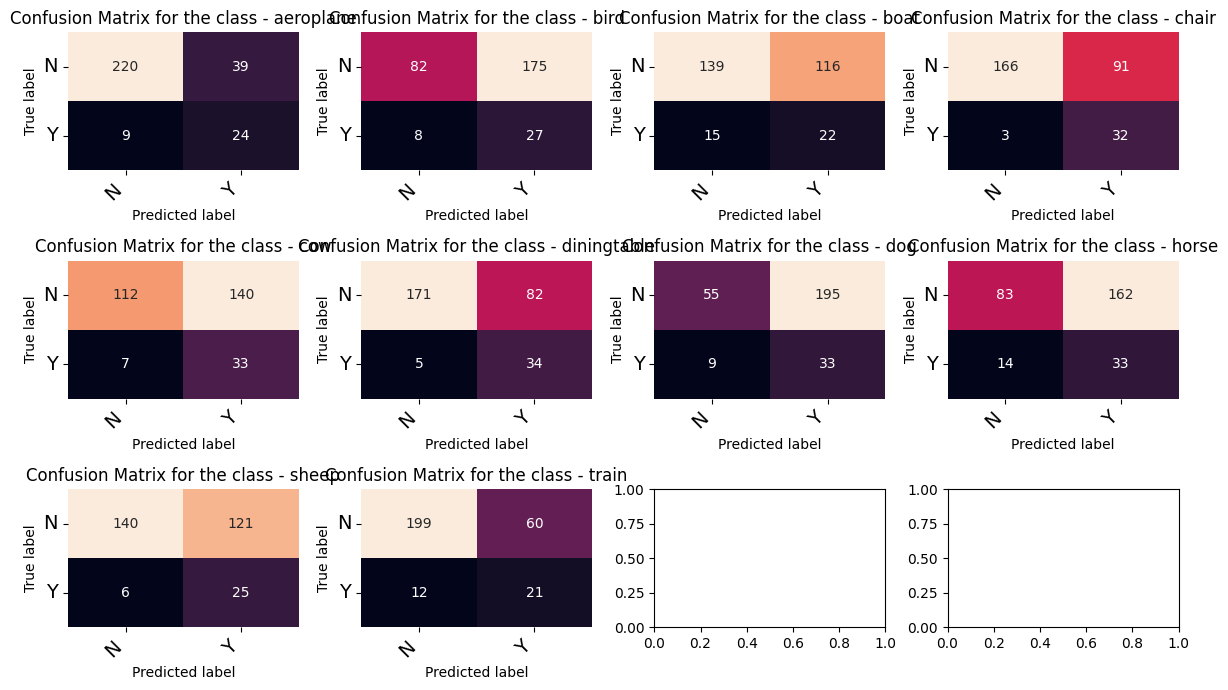

In [122]:
fig, ax = plt.subplots(3, 4, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), mcm, classes):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [147]:
33 / (33+14)

0.7021276595744681

In [141]:
test_df = y_test.reset_index()

In [136]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns=classes

In [140]:
predictions_df

,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
0,0,1,1,0,1,0,1,1,1,1
1,0,1,0,1,0,1,1,1,0,1
2,0,1,1,0,1,0,1,1,1,1
3,1,0,1,1,0,1,1,0,0,0
4,0,1,1,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
287,0,1,0,1,0,1,1,0,0,0
288,0,1,0,0,1,0,1,1,1,0
289,1,0,0,1,0,1,0,0,0,1
290,1,1,0,1,0,1,1,1,0,1


# Transfer learning with VGG

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    # $CHALLENGIFY_BEGIN
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    # $CHALLENGIFY_END
    
    return model

In [28]:
def set_nontrainable_layers(model):
    
    # $CHALLENGIFY_BEGIN
    # Set the first layers to be untrainable
    model.trainable = False
    
    # $CHALLENGIFY_END
    
    return model

In [30]:
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(1024, activation='relu')
prediction_layer = layers.Dense(10, activation='sigmoid')

model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

In [31]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(10, activation='sigmoid')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [32]:
model = add_last_layers(model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 10)                48280394  
                                                                 
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 500)               5500      
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 48,290,904
Trainable params: 10,510
Non-trainable params: 48,280,394
_________________________________________________________________


In [34]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [35]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 500)               16384500  
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
Total params: 31,104,198
Trainable params: 16,389,510
Non-trainable params: 14,714,688
_________________________________________________________________


In [36]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [37]:
model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50


2022-09-12 03:03:56.643395: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-12 03:03:57.402721: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-09-12 03:03:57.403914: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-09-12 03:03:57.403937: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-09-12 03:03:57.404012: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

 1/86 [..............................] - ETA: 7:24 - loss: 4.3986 - accuracy: 0.1250

2022-09-12 03:04:00.301170: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


86/86 [==============================] - 216s 2s/step - loss: 1.0200 - accuracy: 0.3941 - val_loss: 0.5645 - val_accuracy: 0.4061
Epoch 2/50
86/86 [==============================] - 230s 3s/step - loss: 0.0867 - accuracy: 0.8447 - val_loss: 0.5658 - val_accuracy: 0.4437
Epoch 3/50
86/86 [==============================] - 199s 2s/step - loss: 0.0219 - accuracy: 0.8784 - val_loss: 0.7040 - val_accuracy: 0.4437
Epoch 4/50
86/86 [==============================] - 149s 2s/step - loss: 0.0106 - accuracy: 0.8784 - val_loss: 0.6855 - val_accuracy: 0.4573
Epoch 5/50
86/86 [==============================] - 6s 70ms/step - loss: 0.0074 - accuracy: 0.8791 - val_loss: 0.6871 - val_accuracy: 0.4471
Epoch 6/50
86/86 [==============================] - 6s 70ms/step - loss: 0.0053 - accuracy: 0.8806 - val_loss: 0.6972 - val_accuracy: 0.4573
Epoch 7/50
86/86 [==============================] - 6s 73ms/step - loss: 0.0054 - accuracy: 0.8791 - val_loss: 0.6918 - val_accuracy: 0.4573
Epoch 8/50
86/86 [======

In [48]:
from pathlib import Path  

PATH = Path("../raw_data")
PATH_YOURPAINTINGS = PATH/"yourpaintings"
classes = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']

In [40]:
model.save(os.path.join(PATH_YOURPAINTINGS, "vgg"))

INFO:tensorflow:Assets written to: ../raw_data/yourpaintings/vgg/assets


INFO:tensorflow:Assets written to: ../raw_data/yourpaintings/vgg/assets


In [41]:
res = model.evaluate(X_test, y_test)
res

10/10 [==============================] - 3s 122ms/step - loss: 0.6702 - accuracy: 0.5240


[0.6702359914779663, 0.5239726305007935]

In [43]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 52.0 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


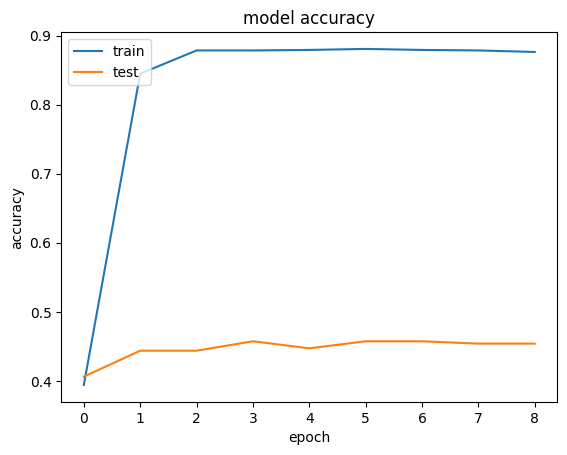

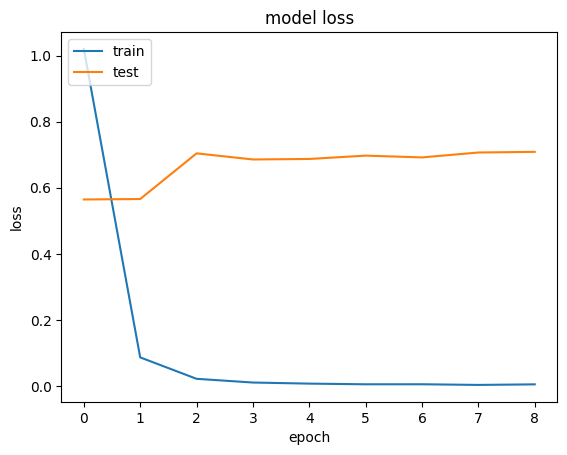

In [44]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
y_pred = model.predict(X_test)
print(np.mean(y_pred))
print(np.median(y_pred))

10/10 [==============================] - 1s 98ms/step
0.077618
2.0692642e-06


In [49]:
predictions = (model.predict(X_test) > np.mean(y_pred)).astype("int32")
print(classification_report(y_test, predictions, output_dict=False, target_names=classes))

10/10 [==============================] - 1s 129ms/step
              precision    recall  f1-score   support

   aeroplane       0.69      0.67      0.68        30
        bird       0.48      0.38      0.42        32
        boat       0.76      0.53      0.62        36
       chair       0.62      0.67      0.64        36
         cow       0.47      0.62      0.53        32
 diningtable       0.63      0.54      0.58        41
         dog       0.40      0.33      0.36        48
       horse       0.59      0.46      0.52        41
       sheep       0.59      0.52      0.55        44
       train       0.86      0.78      0.82        32

   micro avg       0.60      0.54      0.56       372
   macro avg       0.61      0.55      0.57       372
weighted avg       0.60      0.54      0.56       372
 samples avg       0.51      0.55      0.51       372



/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']
predictions_df.sum()

aeroplane      29
bird           25
boat           25
chair          39
cow            43
diningtable    35
dog            40
horse          32
sheep          39
train          29
dtype: int64

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array(y_test)
mcm = multilabel_confusion_matrix(y_true, predictions)

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

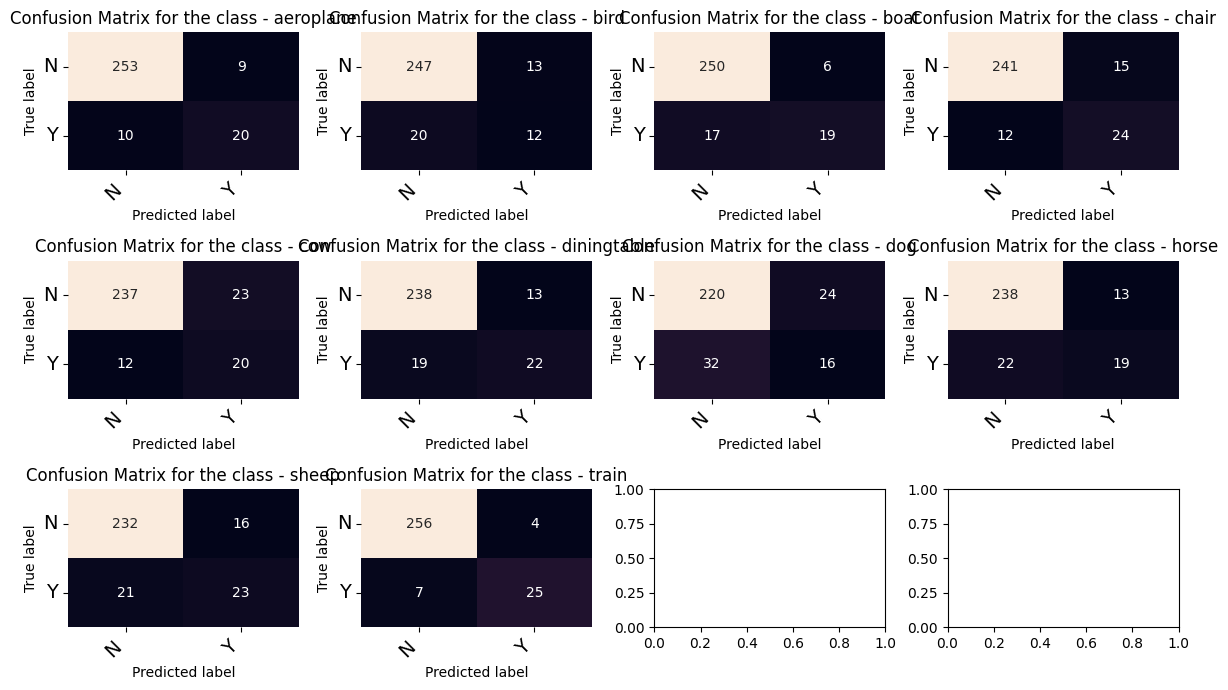

In [56]:
fig, ax = plt.subplots(3, 4, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), mcm, classes):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

10/10 [==============================] - 1s 114ms/step
              precision    recall  f1-score   support

   aeroplane       0.18      0.87      0.30        30
        bird       0.14      0.78      0.24        32
        boat       0.24      0.92      0.38        36
       chair       0.28      1.00      0.44        36
         cow       0.20      0.91      0.32        32
 diningtable       0.28      0.98      0.43        41
         dog       0.23      0.88      0.36        48
       horse       0.22      0.88      0.35        41
       sheep       0.30      0.82      0.44        44
       train       0.26      0.94      0.41        32

   micro avg       0.23      0.90      0.36       372
   macro avg       0.23      0.90      0.37       372
weighted avg       0.24      0.90      0.37       372
 samples avg       0.31      0.91      0.42       372

aeroplane      145
bird           177
boat           138
chair          127
cow            147
diningtable    144
dog            185

/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


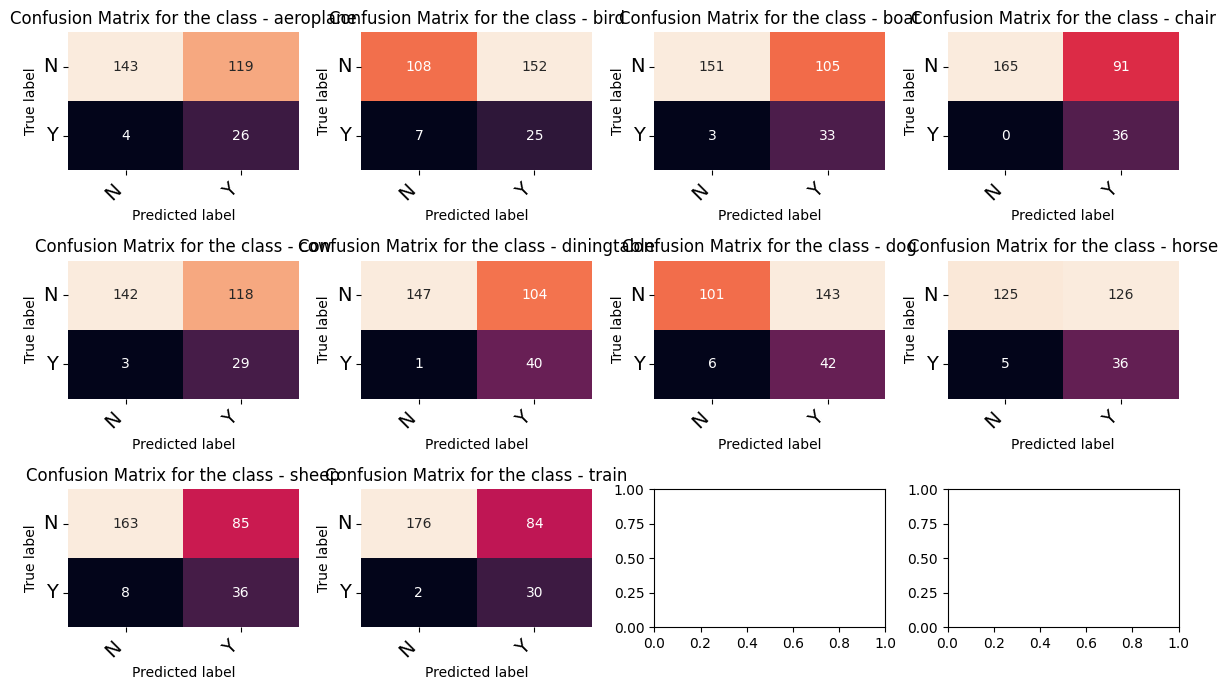

In [58]:
predictions = (model.predict(X_test) > np.median(y_pred)).astype("int32")
print(classification_report(y_test, predictions, output_dict=False, target_names=classes))
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']
print(predictions_df.sum())
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array(y_test)
mcm = multilabel_confusion_matrix(y_true, predictions)

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

fig, ax = plt.subplots(3, 4, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), mcm, classes):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [73]:
def load_model():
    
    # $CHALLENGIFY_BEGIN
    
    model = ResNet152V2(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    # $CHALLENGIFY_END
    
    return model

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [74]:
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 flatten_6 (Flatten)         (None, 131072)            0         
                                                                 
 dense_10 (Dense)            (None, 500)               65536500  
                                                                 
 dense_11 (Dense)            (None, 10)                5010      
                                                                 
Total params: 123,873,158
Trainable params: 65,541,510
Non-trainable params: 58,331,648
_________________________________________________________________


In [75]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
86/86 [==============================] - 18s 123ms/step - loss: 225.1128 - accuracy: 0.1656 - val_loss: 79.2571 - val_accuracy: 0.1536
Epoch 2/50
86/86 [==============================] - 9s 99ms/step - loss: 66.4084 - accuracy: 0.2176 - val_loss: 69.3133 - val_accuracy: 0.2253
Epoch 3/50
86/86 [==============================] - 8s 95ms/step - loss: 49.3475 - accuracy: 0.2791 - val_loss: 51.1481 - val_accuracy: 0.2526
Epoch 4/50
86/86 [==============================] - 8s 92ms/step - loss: 49.1966 - accuracy: 0.2930 - val_loss: 58.7318 - val_accuracy: 0.2253
Epoch 5/50
86/86 [==============================] - 8s 90ms/step - loss: 44.3925 - accuracy: 0.3128 - val_loss: 66.9057 - val_accuracy: 0.1502
Epoch 6/50
86/86 [==============================] - 8s 91ms/step - loss: 31.7492 - accuracy: 0.3912 - val_loss: 41.8218 - val_accuracy: 0.1775
Epoch 7/50
86/86 [==============================] - 8s 90ms/step - loss: 35.1683 - accuracy: 0.3692 - val_loss: 38.8562 - val_accuracy: 0.2

In [76]:
model.save(os.path.join(PATH_YOURPAINTINGS, "resnet"))

INFO:tensorflow:Assets written to: ../raw_data/yourpaintings/resnet/assets


INFO:tensorflow:Assets written to: ../raw_data/yourpaintings/resnet/assets


In [77]:
res = model.evaluate(X_test, y_test)
res

10/10 [==============================] - 2s 116ms/step - loss: 51.6764 - accuracy: 0.2158


[51.676368713378906, 0.21575342118740082]

In [80]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 22.0 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


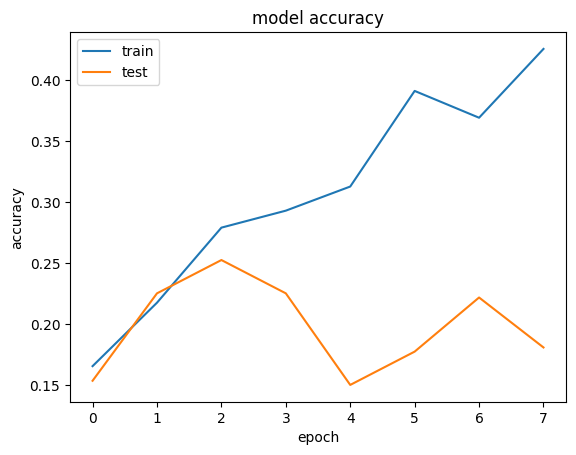

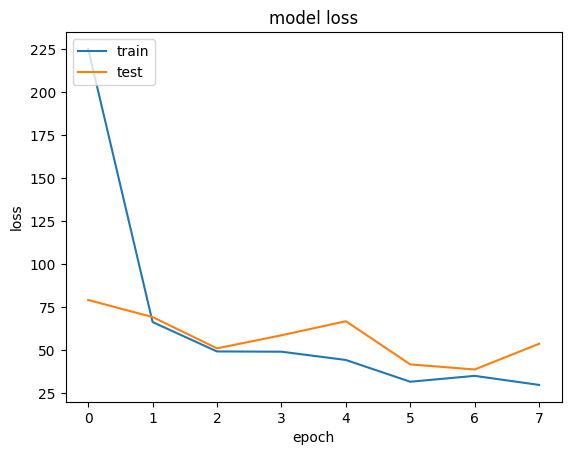

In [81]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
y_pred = model.predict(X_test)
print(np.mean(y_pred))
print(np.median(y_pred))

10/10 [==============================] - 3s 149ms/step
0.058933426
0.0


In [83]:
predictions = (model.predict(X_test) > np.mean(y_pred)).astype("int32")
print(classification_report(y_test, predictions, output_dict=False, target_names=classes))

10/10 [==============================] - 2s 160ms/step
              precision    recall  f1-score   support

   aeroplane       0.63      0.40      0.49        30
        bird       0.00      0.00      0.00        32
        boat       0.67      0.11      0.19        36
       chair       0.21      0.53      0.30        36
         cow       0.28      0.16      0.20        32
 diningtable       0.44      0.20      0.27        41
         dog       0.14      0.02      0.04        48
       horse       0.29      0.05      0.08        41
       sheep       1.00      0.02      0.04        44
       train       0.67      0.12      0.21        32

   micro avg       0.32      0.15      0.21       372
   macro avg       0.43      0.16      0.18       372
weighted avg       0.43      0.15      0.17       372
 samples avg       0.17      0.15      0.15       372



/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']
predictions_df.sum()

aeroplane      19
bird            0
boat            6
chair          92
cow            18
diningtable    18
dog             7
horse           7
sheep           1
train           6
dtype: int64

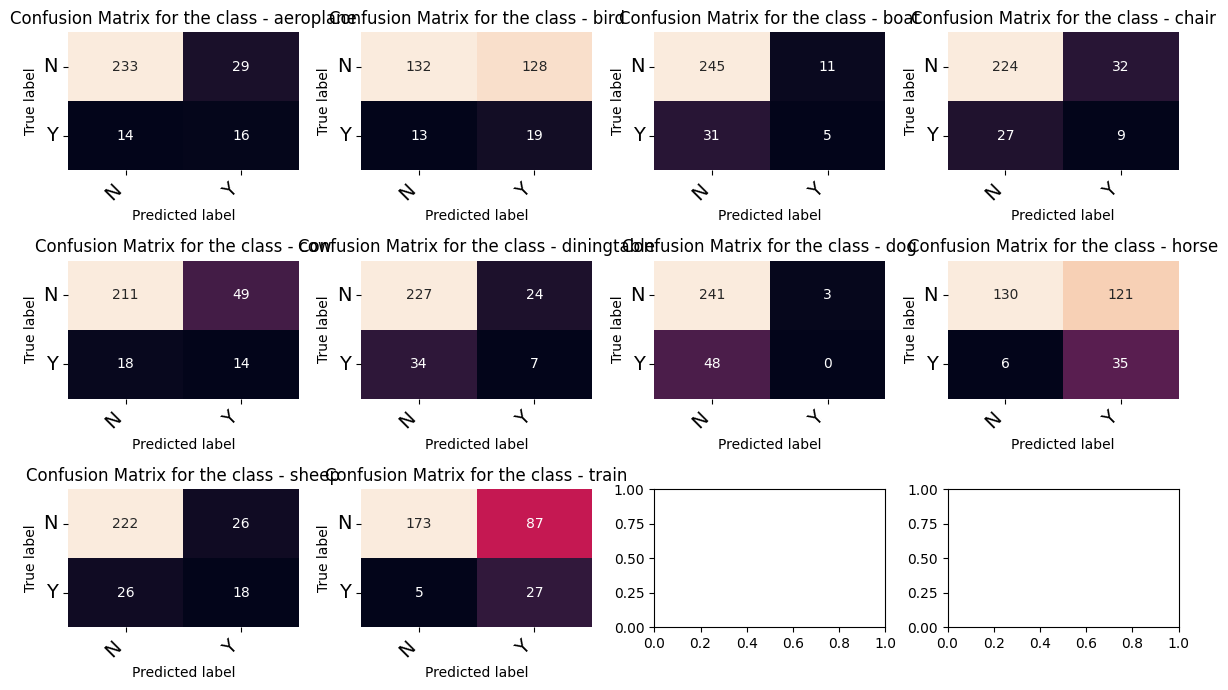

In [85]:
fig, ax = plt.subplots(3, 4, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), mcm, classes):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

10/10 [==============================] - 1s 152ms/step
              precision    recall  f1-score   support

   aeroplane       0.56      0.47      0.51        30
        bird       1.00      0.03      0.06        32
        boat       0.36      0.25      0.30        36
       chair       0.18      0.67      0.29        36
         cow       0.18      0.22      0.20        32
 diningtable       0.33      0.34      0.34        41
         dog       0.23      0.12      0.16        48
       horse       0.27      0.17      0.21        41
       sheep       0.43      0.07      0.12        44
       train       0.27      0.12      0.17        32

   micro avg       0.26      0.24      0.25       372
   macro avg       0.38      0.25      0.23       372
weighted avg       0.37      0.24      0.23       372
 samples avg       0.21      0.24      0.21       372

aeroplane       25
bird             1
boat            25
chair          130
cow             39
diningtable     42
dog             26

/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


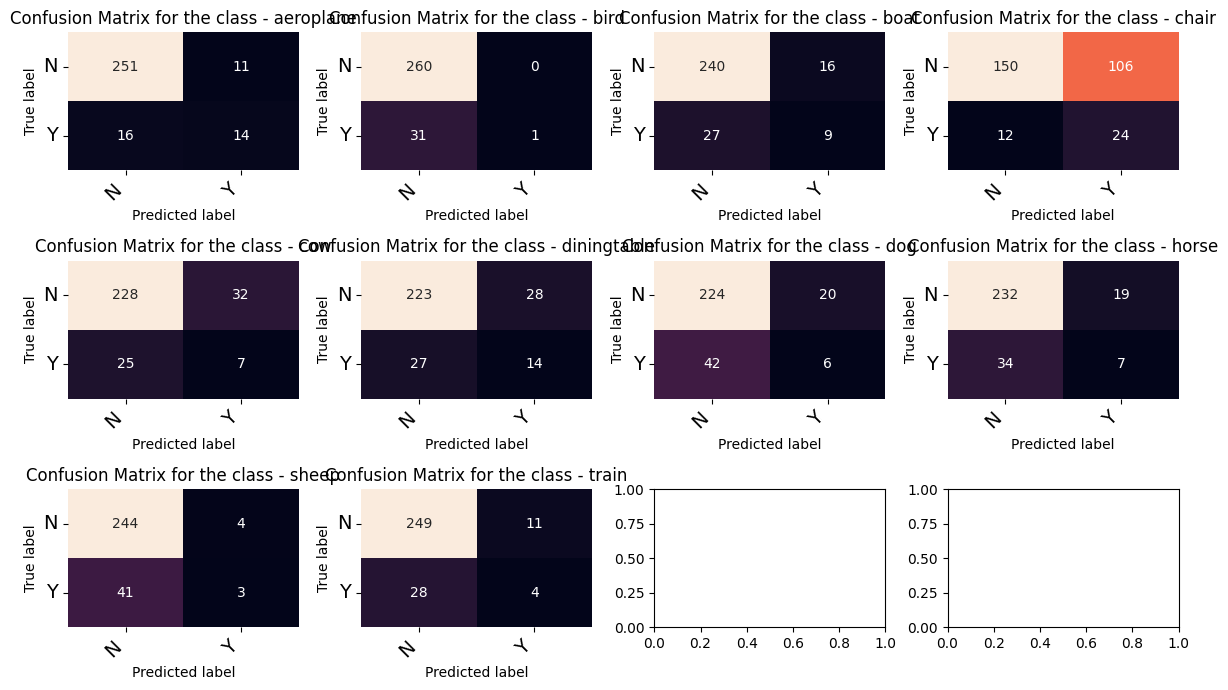

In [86]:
predictions = (model.predict(X_test) > np.median(y_pred)).astype("int32")
print(classification_report(y_test, predictions, output_dict=False, target_names=classes))
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']
print(predictions_df.sum())
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array(y_test)
mcm = multilabel_confusion_matrix(y_true, predictions)

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

fig, ax = plt.subplots(3, 4, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), mcm, classes):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [21]:
import keras

In [22]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
    print(os.getenv("TF_GPU_ALLOCATOR"))
    print(f"memory usage {tf.config.experimental.get_memory_info('GPU:0')['current'] / 10 ** 9} GB")

cuda_malloc_async
memory usage 0.0 GB


In [23]:
def augment_data():
    
    data_augmentation = Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),])
    
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.batch(16).map(lambda x, y: (data_augmentation(x), y))
    
    return train_dataset

In [24]:
train_dataset = augment_data()

In [26]:
input_shape = X_train.shape[1:]
inputs = keras.Input(shape=input_shape)
x = layers.Rescaling(1.0 / 255)(inputs)  # Rescale inputs
outputs = keras.applications.ResNet152V2(  # Add the rest of the model
    weights="imagenet", input_shape=input_shape, classes=10, include_top=False
)(x)
opt = optimizers.Adam(learning_rate=1e-4)
model = keras.Model(inputs, outputs)
model.compile(optimizer=opt, loss="binary_crossentropy")
model.fit(train_dataset, steps_per_epoch=5)

234545216/234545216 [==============================] - 11s 0us/step


ValueError: in user code:

    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/losses.py", line 1930, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/backend.py", line 5298, in binary_crossentropy
        bce = target * tf.math.log(output + epsilon())

    ValueError: Dimensions must be equal, but are 10 and 2048 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](binary_crossentropy/Cast, binary_crossentropy/Log)' with input shapes: [?,10], [?,8,8,2048].


In [91]:
y_pred.shape

(292, 10)

In [97]:
X_test.shape

(292, 256, 256, 3)

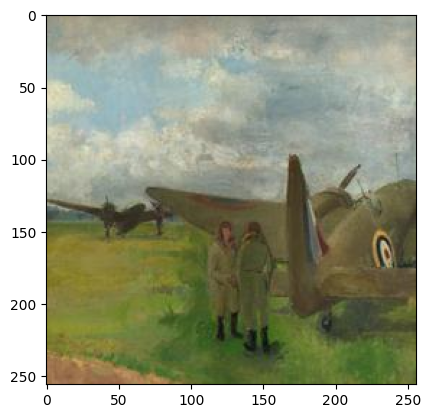

In [98]:
plt.imshow(X_test[0])

In [94]:
predictions.shape

(292, 10)

In [99]:
from sklearn.metrics import multilabel_confusion_matrix

In [106]:
y_true = np.array(y_test)

In [107]:
y_true[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [105]:
predictions[0]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [110]:
mcm = multilabel_confusion_matrix(y_true, predictions)

In [115]:
mcm

array([[[220,  39],
        [  9,  24]],

       [[ 82, 175],
        [  8,  27]],

       [[139, 116],
        [ 15,  22]],

       [[166,  91],
        [  3,  32]],

       [[112, 140],
        [  7,  33]],

       [[171,  82],
        [  5,  34]],

       [[ 55, 195],
        [  9,  33]],

       [[ 83, 162],
        [ 14,  33]],

       [[140, 121],
        [  6,  25]],

       [[199,  60],
        [ 12,  21]]])

In [146]:
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
print(f"the recall for each class is {tp / (tp + fn)}")
classes

the recall for each class is [0.72727273 0.77142857 0.59459459 0.91428571 0.825      0.87179487
 0.78571429 0.70212766 0.80645161 0.63636364]


['aeroplane',
 'bird',
 'boat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'sheep',
 'train']

In [ ]:
hardest_k_examples = testing_set[argsort_loss[-k:]][0]
true_labels = testing_set[argsort_loss[-k:]][1]
predicted_labels = predictions[argsort_loss[-k:]]

In [ ]:
hardest_k_examples = X_test[argsort_loss[-k:]][0]


In [ ]:
def get_hardest_k_examples(model, testing_set, k=32):

    # get the losses and predictions for each item in the dataset
    losses = None
    predictions = None
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            
            if losses is None:
                losses = loss.view((1, 1))
                predictions = pred
            else:
                losses = torch.cat((losses, loss.view((1, 1))), 0)
                predictions = torch.cat((predictions, pred), 0)

    argsort_loss = torch.argsort(losses, dim=0)

    highest_k_losses = losses[argsort_loss[-k:]]
    hardest_k_examples = testing_set[argsort_loss[-k:]][0]
    true_labels = testing_set[argsort_loss[-k:]][1]
    predicted_labels = predictions[argsort_loss[-k:]]

    return highest_k_losses, hardest_k_examples, true_labels, predicted_labels

In [15]:
classes = ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'sheep', 'train']
y_sub = df.loc[:, ['aeroplane', 'bird', 'boat', 'chair', 'cow', 'diningtable',
       'dog', 'horse', 'sheep', 'train']]

In [16]:
df_aeroplane, df_bird, df_boat, df_chair, df_cow, df_diningtable, df_dog, df_horse, df_sheep, df_train = [y_sub[y_sub[cls] == 1] for cls in classes]

In [51]:
def sample_together(n, cls_df):
    cls_df = cls_df.sample(n)
    cls_X = X[cls_df.index]
    print(cls_df.index)
#     cls_X = X.copy()
#     cls_X = cls_X.iloc[cls_df.index]
    return cls_df, cls_X
bird_df, bird_X = sample_together(195, df_bird)

Int64Index([6633, 7771, 8283, 2727, 5635, 6997,  132, 7778, 5578, 7705,
            ...
            3873, 1385, 7685, 4711,  992,  964, 4181, 1953, 8295,  952],
           dtype='int64', length=195)


In [42]:
df_bird.index

Int64Index([  17,   18,   40,   41,   42,   63,   71,   73,  114,  120,
            ...
            8209, 8210, 8217, 8258, 8259, 8282, 8283, 8293, 8294, 8295],
           dtype='int64', length=781)

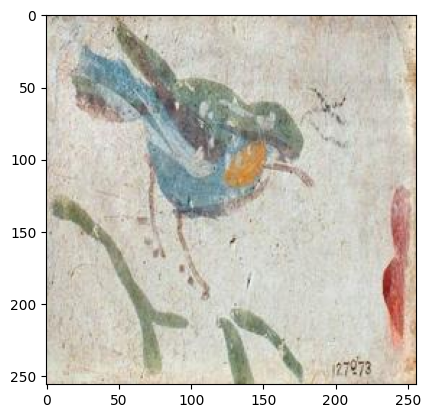

In [44]:
plt.imshow(X[40])

In [ ]:
def load_data(df):
    '''generates X and y'''
    '''read from disk or read from cloud'''
    for index, row in df.iterrows():
        img_file = str(row["filename"])
        image = Image.open(os.path.join(config.PATH_YOURPAINTINGS_SM, img_file))   
        imgs.append(np.array(image))
        X = np.array(imgs)
        X.shape
        y = df.drop(columns=['index', 'Image URL', 'Web page URL', 'Subset', 'Labels', 'filename', 'labels'])
        y.shape
    else:
        print(f"Please specify method of loading data/n testing")
    return X, y
X, y = load_data(df)

In [26]:
X.shape

(8296, 256, 256, 3)

In [49]:
df_bird.index

Int64Index([  17,   18,   40,   41,   42,   63,   71,   73,  114,  120,
            ...
            8209, 8210, 8217, 8258, 8259, 8282, 8283, 8293, 8294, 8295],
           dtype='int64', length=781)

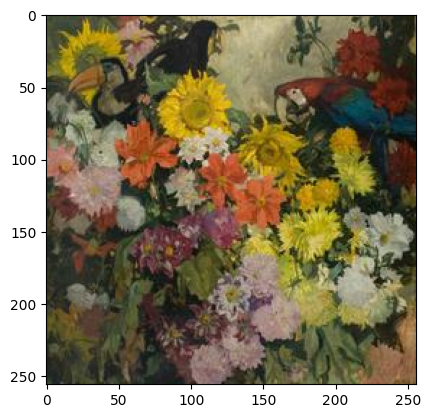

In [56]:
plt.imshow(bird_X[3])

In [32]:
arr = np.array([2, 3, 21, 1, 8, 9, 21, 4, 18, 6, 21])
# Get maximum value of array
max_val = np.max(arr)
# Find indices of maximum value using where()
idx = np.where(arr == max_val)
print(f'Indices of max value is {idx[0]}')

Indices of max value is [ 2  6 10]


In [36]:
df_test

,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
257,0,1,0,0,0,0,0,0,0,0
999,0,1,0,0,0,0,0,0,0,0
7022,0,1,0,0,0,0,0,1,0,0
7661,0,1,0,1,0,1,0,0,0,0
4835,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7153,0,1,0,0,0,0,1,0,0,0
3872,0,1,0,0,0,0,1,1,1,0
8295,0,1,0,0,0,0,0,0,0,0
6748,0,1,0,0,0,0,0,0,0,0


In [23]:
y_test

,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
257,0,1,0,0,0,0,0,0,0,0
999,0,1,0,0,0,0,0,0,0,0
7022,0,1,0,0,0,0,0,1,0,0
7661,0,1,0,1,0,1,0,0,0,0
4835,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7153,0,1,0,0,0,0,1,0,0,0
3872,0,1,0,0,0,0,1,1,1,0
8295,0,1,0,0,0,0,0,0,0,0
6748,0,1,0,0,0,0,0,0,0,0


In [ ]:
def sample_together(n, cls_df, img):
    cls_df = cls_df.sample(n)
    return cls_df, img.iloc[cls_df.index]
df_test, y_test = sample_together(195, df_bird, y)

In [17]:
def sample_together(n, X, y):
    X = X.sample(n)
    return X, y.iloc[X.index]
df_test, y_test = sample_together(195, df_bird, y)

In [18]:
df_test

,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
6257,0,1,0,0,0,0,0,0,0,0
593,0,1,0,0,0,0,0,0,0,0
4933,0,1,0,0,0,0,0,0,0,0
578,0,1,0,0,0,0,0,0,0,0
1011,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8293,0,1,0,0,0,0,0,0,0,0
1022,0,1,0,0,0,0,0,0,0,0
8185,0,1,0,1,0,1,0,0,0,0
1551,0,1,0,0,1,0,0,0,0,0


In [19]:
y_test

,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
6257,0,1,0,0,0,0,0,0,0,0
593,0,1,0,0,0,0,0,0,0,0
4933,0,1,0,0,0,0,0,0,0,0
578,0,1,0,0,0,0,0,0,0,0
1011,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8293,0,1,0,0,0,0,0,0,0,0
1022,0,1,0,0,0,0,0,0,0,0
8185,0,1,0,1,0,1,0,0,0,0
1551,0,1,0,0,1,0,0,0,0,0


In [2]:
df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_FILE}")

In [2]:
df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_FILE}")

NameError: name 'pd' is not defined

In [3]:
df

,index,Image URL,Web page URL,Subset,Labels,filename,labels,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
0,0,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/and-the-co...,'test',' cow',NID_QUB_QUB_264-001.jpg,['cow'],0,0,0,0,1,0,0,0,0,0
1,1,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/0-6-00-6-0...,'train',' train',GMIII_MOSI_A1978_72_3-001.jpg,['train'],0,0,0,0,0,0,0,0,0,1
2,2,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/044t-locom...,'train',' train',NY_NRM_1979_7964-001.jpg,['train'],0,0,0,0,0,0,0,0,0,1
3,3,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/080-locomo...,'test',' train',CHE_CRHC_PCF40-001.jpg,['train'],0,0,0,0,0,0,0,0,0,1
4,4,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/17th-and-2...,'test',' horse',NOT_NTMAG_1997_31-001.jpg,['horse'],0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,8623,https://d3d00swyhr67nd.cloudfront.net/w944h944...,https://artuk.org/discover/artworks/youth-82434,'test',' diningtable',LLR_AWC_0047-001.jpg,['diningtable'],0,0,0,0,0,1,0,0,0,0
8292,8625,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/yport-20094,'test',' boat',STF_STKMG_1965_FA_10-001.jpg,['boat'],0,0,1,0,0,0,0,0,0,0
8293,8626,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/yport-norm...,'train',' bird',NY_YAG_YORAG_1030-001.jpg,['bird'],0,1,0,0,0,0,0,0,0,0
8294,8627,https://d3d00swyhr67nd.cloudfront.net/w944h944...,https://artuk.org/discover/artworks/zebra-and-...,'train',' bird',GL_GM_A_1989_23_e-001.jpg,['bird'],0,1,0,0,0,0,0,0,0,0


In [12]:
from io import BytesIO
client = storage.Client() # Implicit environment set up
# with explicit set up:
# client = storage.Client.from_service_account_json('key-file-location')

bucket = client.get_bucket(config.BUCKET_NAME)

blob_uri = f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_PATH}/NID_QUB_QUB_264-001.jpg"
print(blob_uri)
#blob_source = vision.Image(source=vision.ImageSource(image_uri=blob_uri))
#blob = bucket.get_blob(blob_uri)
#print(blob)
#Image(blob.download_as_bytes())
#img = Image.open(BytesIO(blob_uri.download_as_bytes()))

gs://art-api/data/raw_data/yourpaintings_sm/NID_QUB_QUB_264-001.jpg


In [16]:
client = storage.Client()
bucket = client.get_bucket(config.BUCKET_NAME)
blob = storage.Blob(config.BUCKET_TRAIN_DATA_PATH, bucket)
with open('file-to-download-to', 'w') as file_obj:
    client.download_blob_to_file(blob, file_obj)

NotFound: 404 GET https://storage.googleapis.com/download/storage/v1/b/art-api/o/data%2Fraw_data%2Fyourpaintings_sm?alt=media: No such object: art-api/data/raw_data/yourpaintings_sm: ('Request failed with status code', 404, 'Expected one of', <HTTPStatus.OK: 200>, <HTTPStatus.PARTIAL_CONTENT: 206>)

data/raw_data/yourpaintings_sm/NID_QUB_QUB_264-001.jpg
<Blob: art-api, data/raw_data/yourpaintings_sm/NID_QUB_QUB_264-001.jpg, 1662730399385007>


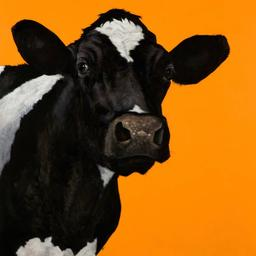

In [34]:
from pathlib import Path  

from IPython.display import Image

client = storage.Client()
bucket = client.bucket(config.BUCKET_NAME)
#path = Path(config.BUCKET_TRAIN_DATA_PATH/"NID_QUB_QUB_264-001.jpg")
path = f"{config.BUCKET_TRAIN_DATA_PATH}/NID_QUB_QUB_264-001.jpg"
print(path)
blob = bucket.get_blob(path)
print(blob)
# download to memory
Image(blob.download_as_bytes())

#blob = bucket.get_blob('images/test.png')
#Image(blob.download_as_bytes())

In [22]:
from io import BytesIO
from PIL import Image

img = Image.open(BytesIO(blob.download_as_bytes()))

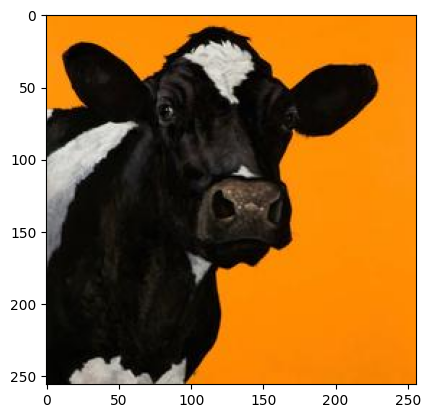

In [24]:
plt.imshow(img)